## Homework 5: Weather Prediction

### Jacqueline Beechert, jbeechert@berkeley.edu

Due Tuesday March 8, 2022 @ 5pm

## 1. Use the data supplied of airport codes (ICAO_airports.csv) and top airports (top_airports.csv) to make a table of 50 most travelled airports in the US and containing relevant information, like name, wikipedia link, latitude, longitude

In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
icao_df = pd.read_csv("hw_5_data/ICAO_airports.csv")
top_df = pd.read_csv("hw_5_data/top_airports.csv")

In [3]:
icao_df.head(5)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
2,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
3,6526,00AR,heliport,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,00AR,NaN,00AR,NaN,NaN,NaN
4,6527,00AZ,small_airport,Cordes Airport,34.305599,-112.165001,3810.0,NaN,US,US-AZ,Cordes,no,00AZ,NaN,00AZ,NaN,NaN,NaN


In [4]:
top_50_df = top_df.nlargest(50, "Enplanements")
top_50_airport_names = top_50_df["Airport"].values
print(top_50_airport_names[:5])

['Hartsfield-Jackson Atlanta International Airport'
 "Chicago O'Hare International Airport"
 'Los Angeles International Airport'
 'Dallas/Fort Worth International Airport' 'Denver International Airport']


In [5]:
# make icao table

!rm hw5.db
connection = sqlite3.connect("hw5.db")

cursor = connection.cursor()

sql_cmd = """CREATE TABLE IF NOT EXISTS icao (id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT, ident TEXT, wikipedia_link TEXT, latitude FLOAT, longitude FLOAT)"""

cursor.execute(sql_cmd)

for i, row in icao_df.iterrows():

    name = row['name']
    ident = row['ident']
    wiki = str(row["wikipedia_link"])
    latitude = row["latitude_deg"]
    longitude = row["longitude_deg"] 

    data = (name, ident, wiki, latitude, longitude)

    # "or ignore" prevents inserting values if the primary key already exists
    sql_cmd = ("INSERT OR IGNORE INTO icao (name, ident, wikipedia_link, latitude, longitude) VALUES" + str(data))
    cursor.execute(sql_cmd)
    
    connection.commit()  

In [6]:
# make top 50 table

cursor = connection.cursor()

sql_cmd = """CREATE TABLE IF NOT EXISTS top50 (id INTEGER PRIMARY KEY AUTOINCREMENT,
    city TEXT, airport TEXT, icao TEXT, enplanements INT)"""

cursor.execute(sql_cmd)

for i, row in top_50_df.iterrows():
    
    city = str(row['City'])
    airport = str(row["Airport"])
    icao = str(row["ICAO"])
    enplanements = int(row["Enplanements"])
    
    data = (city, airport, icao, enplanements)
    
    sql_cmd = ("INSERT OR IGNORE INTO top50 (city, airport, icao, enplanements) VALUES " + str(data))
    cursor.execute(sql_cmd)
    
    
    connection.commit()

In [7]:
sql_cmd = f"""SELECT *, top50.icao FROM icao, top50 WHERE icao.ident == top50.icao"""

In [8]:
cursor.execute(sql_cmd)

In [9]:
db_info = cursor.fetchall()

cnt = 0
for entry in db_info: 
    cnt += 1
print(cnt)

50


In [10]:
cursor = connection.cursor()

sql_cmd = """CREATE TABLE IF NOT EXISTS icao_top50 (id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT, ident TEXT, wikipedia_link TEXT, latitude FLOAT, longitude FLOAT)"""

cursor.execute(sql_cmd)

for entry in db_info:

    # "or ignore" prevents inserting values if the primary key already exists
    sql_cmd = ("INSERT OR IGNORE INTO icao_top50 (name, ident, wikipedia_link, latitude, longitude) VALUES" 
               + str(entry[1:6]))
    cursor.execute(sql_cmd)
#     db_info = cursor.fetchall()
#     for entry in db_info:
#         print(entry)
    
    connection.commit()  

In [11]:
#connection = sqlite3.connect("/tmp/example2.db")

cursor = connection.cursor()

sql_cmd = """SELECT * FROM icao_top50"""

cursor.execute(sql_cmd)
db_info = cursor.fetchall()
for entry in db_info: 
    print(entry)
    
connection.close()

(1, 'Hartsfield Jackson Atlanta International Airport', 'KATL', 'http://en.wikipedia.org/wiki/Hartsfield-Jackson_Atlanta_International_Airport', 33.6366996765137, -84.4281005859375)
(2, 'Austin Bergstrom International Airport', 'KAUS', 'http://en.wikipedia.org/wiki/Austin-Bergstrom_International_Airport', 30.1944999694824, -97.6698989868164)
(3, 'Nashville International Airport', 'KBNA', 'http://en.wikipedia.org/wiki/Nashville_International_Airport', 36.1245002746582, -86.6781997680664)
(4, 'General Edward Lawrence Logan International Airport', 'KBOS', 'http://en.wikipedia.org/wiki/Logan_International_Airport', 42.36429977, -71.00520325)
(5, 'Baltimore/Washington International Thurgood Marshal Airport', 'KBWI', 'http://en.wikipedia.org/wiki/Baltimore-Washington_International_Thurgood_Marshall_Airport', 39.17539978, -76.66829681)
(6, 'Cleveland Hopkins International Airport', 'KCLE', 'http://en.wikipedia.org/wiki/Cleveland_Hopkins_International_Airport', 41.4117012024, -81.8498001099)
(

## 2. Build another table that will hold historical weather information: min/max temperature, relative humidity, and precipitation

In [12]:
# connection = sqlite3.connect("hw5.db")

# cursor = connection.cursor()

# cursor.execute("DROP TABLE weather")

In [13]:
# make weather table

# connection = sqlite3.connect("weather.db")
connection = sqlite3.connect("hw5.db")

cursor = connection.cursor()

#sql_cmd = """CREATE TABLE weather (id INTEGER PRIMARY KEY, code TEXT, lat FLOAT, lon FLOAT, 
#            min_temp FLOAT, max_temp FLOAT, min_hum FLOAT, max_hum FLOAT, precipitation FLOAT)"""

sql_cmd = """CREATE TABLE weather (time INTEGER, code TEXT, lat FLOAT, lon FLOAT, 
            min_temp FLOAT, max_temp FLOAT, min_hum FLOAT, max_hum FLOAT, precipitation FLOAT)"""

cursor.execute(sql_cmd)

## 3. Using the data from the xarray/netCDF4 example in class, populate the database from 1990-2000

In [14]:
import xarray as xr
import numpy as np
import pandas as pd

In [15]:
def select_data(path):
    
    # Open the data set as xarray
    xr_ = xr.open_dataset(path)
    
    # Select data between 1990-2000
    xr_ = xr_.sel(time=slice("1990-01-01", "2000-12-31"))
    
    return xr_

In [16]:
min_temp_path = "http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_tasmin_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc" 

min_temp_xr = select_data(min_temp_path)

In [18]:
# Data path from lecture
max_temp_path = "http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_tasmax_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc" 

max_temp_xr = select_data(max_temp_path)

In [20]:
min_hum_path = "http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_rhsmin_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc" 

min_hum_xr = select_data(min_hum_path)

In [21]:
max_hum_path = "http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_rhsmax_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc" 

max_hum_xr = select_data(max_hum_path)

In [22]:
precip_path = "http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_pr_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc" 

precip_xr = select_data(precip_path)

In [23]:
# Same latitudes and longitudes for all weather metrics
lats = max_temp_xr["air_temperature"]["lat"].values
lons = max_temp_xr["air_temperature"]["lon"].values

In [24]:
data = []

cursor = connection.cursor()

for row in cursor.execute('SELECT * FROM icao_top50' ):
    
    
    # Get the idx, lat, and lon of each airport in icao_top50 table
    idx = row[0]
    code = row[2]
    lat = row[4]
    lon = row[5]
    if lon < 0:
        lon = lon + 360.
    
    
    # Find lat, lon in xarrays closest to lat, lon in icao_top50 table
    lat_dist = abs(lat - np.array(lats))
    lat_key = np.where(lat_dist == min(lat_dist))[0]
    xarr_lat = lats[lat_key][0]
    
    lon_dist = abs(lon - np.array(lons))
    lon_key = np.where(lon_dist == min(lon_dist))[0]
    xarr_lon = lons[lon_key][0]
    
    
    # Get weather info at each of these lat, lon locations
    # Each of these lists contains 4018 elements (1 per day from 1990-2000)
    min_temp = min_temp_xr["air_temperature"].sel(lat=xarr_lat, lon=xarr_lon).values
    max_temp = max_temp_xr["air_temperature"].sel(lat=xarr_lat, lon=xarr_lon).values
    
    min_hum = min_hum_xr["relative_humidity"].sel(lat=xarr_lat, lon=xarr_lon).values
    max_hum = max_hum_xr["relative_humidity"].sel(lat=xarr_lat, lon=xarr_lon).values
    
    precip = precip_xr["precipitation"].sel(lat=xarr_lat, lon=xarr_lon).values
    

    # Zip together the weather conditions for one given location at one given time
    weather_data = list(zip(min_temp, max_temp, min_hum, max_hum, precip))

    
    # Append all of the weather data, with the locations, to a list
    # This list will have 4018 x number of airport rows 
    cnt = 0
    for entry in weather_data:
        ls = [cnt, code, xarr_lat, xarr_lon]
        for x in entry:
            ls.append(x)
        cnt += 1

        data.append(ls) 

In [26]:
cursor = connection.cursor()

cnt = 0
for entry in data:
    
    if True in [math.isnan(x) for x in entry[2:]]:
        continue
    
    entry = tuple(entry)
    
    sql_cmd = ("INSERT INTO weather (time, code, lat, lon, min_temp, max_temp, min_hum, max_hum, precipitation) VALUES " + str(entry[:]))

    cursor.execute(sql_cmd)
    cnt += 1

connection.commit()  

In [27]:
cursor = connection.cursor()

sql_cmd = """SELECT * FROM weather"""

cursor.execute(sql_cmd)
db_info = cursor.fetchall()
    
connection.close()

## 4) For each pair of cities/airports determine how the daily change of temperature high and precipitation from one city predicts the daily change of the other city 1, 3, & 7 days in advance

In [28]:
connection = sqlite3.connect("hw5.db")

cursor = connection.cursor()

sql_cmd = """SELECT weather.time, weather.code, weather.max_temp, weather.precipitation FROM weather"""

cursor.execute(sql_cmd)

weather_info = np.array(cursor.fetchall())
weather_info

array([['0', 'KATL', '293.6379', '0.0'],
       ['1', 'KATL', '295.29486', '0.0'],
       ['2', 'KATL', '288.08762', '7.2324095'],
       ...,
       ['4015', 'KTPA', '295.97693', '0.0'],
       ['4016', 'KTPA', '289.58853', '0.0'],
       ['4017', 'KTPA', '288.2358', '0.0']], dtype='<U32')

In [29]:
# Save the weather info (time, airport code, max temp, and precipitation) as a datafame
df = pd.DataFrame(weather_info)
df.columns = ["time", "code", "temp", "precip"]
df = df.astype(dtype= {"time":"int64",
        "code":"object","temp":"float64","precip":"float64"})
df

,time,code,temp,precip
0,0,KATL,293.63790,0.000000
1,1,KATL,295.29486,0.000000
2,2,KATL,288.08762,7.232410
3,3,KATL,287.15180,12.500265
4,4,KATL,281.25530,2.387825
...,...,...,...,...
192859,4013,KTPA,293.53293,0.000000
192860,4014,KTPA,296.22880,5.009379
192861,4015,KTPA,295.97693,0.000000
192862,4016,KTPA,289.58853,0.000000


In [54]:
# Store the airport names in a convenient list
airports = df["code"].values[::4018]

In [55]:
# Find the changes in temperature and precipitation, going back 1, 3, and 7 days.
# Do this for each airport and append each airport's changes to a list.
t_shift_1 = []
t_shift_3 = []
t_shift_7 = []

p_shift_1 = []
p_shift_3 = []
p_shift_7 = []

for code in airports:

    # subtract weather from previous days using .shift(# days)
    t_shift_1.append(np.array(df['temp'][df["code"] == code] - df['temp'][df["code"] == code].shift(1)))
    t_shift_3.append(np.array(df['temp'][df["code"] == code] - df['temp'][df["code"] == code].shift(3)))
    t_shift_7.append(np.array(df['temp'][df["code"] == code] - df['temp'][df["code"] == code].shift(7)))
    
    p_shift_1.append(np.array(df['precip'][df["code"] == code] - df['precip'][df["code"] == code].shift(1)))
    p_shift_3.append(np.array(df['precip'][df["code"] == code] - df['precip'][df["code"] == code].shift(3)))
    p_shift_7.append(np.array(df['precip'][df["code"] == code] - df['precip'][df["code"] == code].shift(7)))

In [56]:
# Combine all of the airports' shifts into one list...
t_shift_1_tot = [x for y in t_shift_1 for x in y]
t_shift_3_tot = [x for y in t_shift_3 for x in y]
t_shift_7_tot = [x for y in t_shift_7 for x in y]

p_shift_1_tot = [x for y in p_shift_1 for x in y]
p_shift_3_tot = [x for y in p_shift_3 for x in y]
p_shift_7_tot = [x for y in p_shift_7 for x in y]

In [57]:
# ...and then append those total lists as columns to the data frame
df['dtemp_1'] = t_shift_1_tot
df['dtemp_3'] = t_shift_3_tot
df['dtemp_7'] = t_shift_7_tot

df['dprecip_1'] = p_shift_1_tot
df['dprecip_3'] = p_shift_3_tot
df['dprecip_7'] = p_shift_7_tot

In [58]:
df

,time,code,temp,precip,dtemp_1,dtemp_3,dtemp_7,dprecip_1,dprecip_3,dprecip_7
0,0,KATL,293.63790,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,1,KATL,295.29486,0.000000,1.65696,NaN,NaN,0.000000,NaN,NaN
2,2,KATL,288.08762,7.232410,-7.20724,NaN,NaN,7.232410,NaN,NaN
3,3,KATL,287.15180,12.500265,-0.93582,-6.48610,NaN,5.267856,12.500265,NaN
4,4,KATL,281.25530,2.387825,-5.89650,-14.03956,NaN,-10.112440,2.387825,NaN
...,...,...,...,...,...,...,...,...,...,...
192859,4013,KTPA,293.53293,0.000000,1.21076,-3.67633,-2.89072,0.000000,0.000000,0.000000
192860,4014,KTPA,296.22880,5.009379,2.69587,4.39216,-4.78670,5.009379,5.009379,5.009379
192861,4015,KTPA,295.97693,0.000000,-0.25187,3.65476,-4.96937,-5.009379,0.000000,-1.410866
192862,4016,KTPA,289.58853,0.000000,-6.38840,-3.94440,-9.84137,0.000000,0.000000,0.000000


In [59]:
import matplotlib.pyplot as plt

In [60]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [61]:
from haversine import haversine, Unit # https://pypi.org/project/haversine/

In [77]:
# Find the correlations between each of the airports' 1-, 3-, and 7-day
#  changes in temperature and precipitation. 
# Store the results in a new dataframe.


rows = []

for i in range(0,len(airports)):
    
    # Get the first airport...
    code = airports[i]
    
    # ...and it's latitude and longitude.
    lat = icao_df.loc[icao_df["ident"]==code]["latitude_deg"].values[0]
    lon = icao_df.loc[icao_df["ident"]==code]["longitude_deg"].values[0]
    x = (lat, lon)
    
    for j in range(i+1,len(airports)):
        
        # Get the second airport
        code2 = airports[j]
        
        # ...and it's latitude and longitude.
        lat2 = icao_df.loc[icao_df["ident"]==code2]["latitude_deg"].values[0]
        lon2 = icao_df.loc[icao_df["ident"]==code2]["longitude_deg"].values[0]
        x2 = (lat2, lon2)
        
        # Find distance between the two airports
        distance = haversine(x, x2, unit='km')
#         lon_diff = np.abs(lon - lon2)
        lon_diff = lon - lon2
    
        ls = []
        
        # Calculate correlation coefficients for 1-, 3-, and 7-day changes
        for z in [1, 3, 7]:
            dt = df[f"dtemp_{z}"][df["code"] == code].values
            dt2 = df[f"dtemp_{z}"][df["code"] == code2].values
            t_corrcoef = np.corrcoef(dt, dt2)[0, 1] # want off-diagonal entry
            
            dp = df[f"dprecip_{z}"][df["code"] == code].values
            dp2 = df[f"dprecip_{z}"][df["code"] == code2].values
            p_corrcoef = np.corrcoef(dp, dp2)[0, 1] # want off-diagonal entry
            
            ls.append(t_corrcoef) 
            ls.append(p_corrcoef)
        
        rows.append([code, code2, distance, lon_diff] + ls)

In [78]:
df_corr = pd.DataFrame(rows, columns=[ "airport1", "airport2", "distance_km", "lon_diff", "t_corrcoef_1",
                        "p_corrcoef_1", "t_corrcoef_3", "p_corrcoef_3", "t_corrcoef_7", "p_corrcoef_7"])
df_corr

,airport1,airport2,distance_km,lon_diff,t_corrcoef_1,p_corrcoef_1,t_corrcoef_3,p_corrcoef_3,t_corrcoef_7,p_corrcoef_7
0,KATL,KAUS,1305.993121,13.241798,0.254479,-0.115694,0.441840,-0.002528,0.482535,-0.001192
1,KATL,KBNA,344.433607,2.250099,0.682414,0.487707,0.831678,0.560447,0.857422,0.542631
2,KATL,KBOS,1521.555864,-13.422897,0.148594,-0.050312,0.282573,0.055327,0.318632,0.051159
3,KATL,KBWI,927.532045,-7.759804,0.364497,0.219676,0.535543,0.322697,0.565729,0.325693
4,KATL,KCLE,893.817350,-2.578300,0.381235,0.217636,0.509717,0.237988,0.553378,0.212033
...,...,...,...,...,...,...,...,...,...,...
1123,KSMF,KSTL,2695.196857,-31.221001,-0.095284,0.009284,-0.184310,-0.068206,-0.151212,-0.020456
1124,KSMF,KTPA,3786.735641,-39.057800,-0.041907,-0.004772,-0.074444,-0.028088,-0.160589,-0.016244
1125,KSNA,KSTL,2520.450143,-27.497993,-0.094702,-0.049095,-0.126293,-0.050684,-0.084696,-0.035546
1126,KSNA,KTPA,3415.985722,-35.334793,-0.008495,0.006045,-0.127700,-0.030497,-0.247703,-0.019103


In [79]:
n = 10
top_t_1 = df_corr.nlargest(n, "t_corrcoef_1", keep="all")
top_t_1 = top_t_1[["airport1", "airport2", "lon_diff", "distance_km", "t_corrcoef_1"]]

top_t_3 = df_corr.nlargest(n, "t_corrcoef_3", keep="all")
top_t_3 = top_t_3[["airport1", "airport2", "lon_diff", "distance_km", "t_corrcoef_3"]]

top_t_7 = df_corr.nlargest(n, "t_corrcoef_7", keep="all")
top_t_7 = top_t_7[["airport1", "airport2", "lon_diff", "distance_km", "t_corrcoef_7"]]

top_p_1 = df_corr.nlargest(n, "p_corrcoef_1", keep="all")
top_p_1 = top_p_1[["airport1", "airport2", "lon_diff", "distance_km", "p_corrcoef_1"]]

top_p_3 = df_corr.nlargest(n, "p_corrcoef_3", keep="all")
top_p_3 = top_p_3[["airport1", "airport2", "lon_diff", "distance_km", "p_corrcoef_3"]]

top_p_7 = df_corr.nlargest(n, "p_corrcoef_7", keep="all")
top_p_7 = top_p_7[["airport1", "airport2", "lon_diff", "distance_km", "p_corrcoef_7"]]

In [80]:
top_t_7

,airport1,airport2,lon_diff,distance_km,t_corrcoef_7
350,KDAL,KDFW,0.186203,18.246785,0.997313
724,KJFK,KLGA,0.093697,17.198527,0.997056
541,KEWR,KLGA,-0.296104,26.667185,0.996863
881,KMDW,KORD,0.152397,24.856150,0.994091
538,KEWR,KJFK,-0.389801,33.395357,0.993998
601,KHOU,KIAH,0.062500,38.174432,0.991410
1001,KOAK,KSFO,0.153999,17.695006,0.990715
186,KBWI,KDCA,0.369400,48.072212,0.987449
393,KDCA,KIAD,0.418106,37.612873,0.987286
579,KFLL,KMIA,0.137901,33.990810,0.984374


### Okay, now I have correlation coefficients for pairs of airports, temperature and precipitation, over 1, 3, and 7 days. 

## 5) Plot the correlation strengths for the 10 top pairs for all three dates, for temperature and precipitation (separately) as a function of distance. Also make a plot as a function of longitude different. What trends do you see?

### Temperature

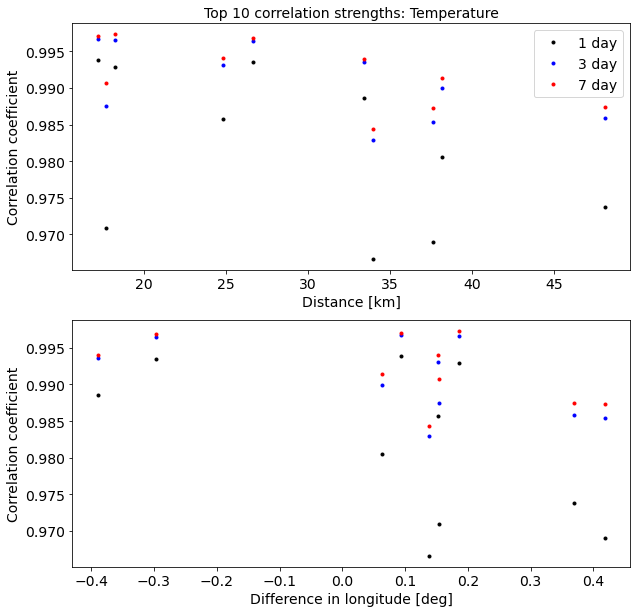

In [81]:
plt.figure(figsize=(10,10))

# Plot temperature as a function of distance
plt.subplot(211)
plt.plot(top_t_1["distance_km"], top_t_1["t_corrcoef_1"], "k.", label="1 day")
plt.plot(top_t_3["distance_km"], top_t_3["t_corrcoef_3"], "b.", label="3 day")
plt.plot(top_t_7["distance_km"], top_t_7["t_corrcoef_7"], "r.", label="7 day")

plt.title("Top 10 correlation strengths: Temperature", fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Correlation coefficient", fontsize=14)
plt.xlabel("Distance [km]", fontsize=14)
plt.legend(fontsize=14, bbox_to_anchor=(1,1));


# Plot temperature as a function of difference in longitude
plt.subplot(212)
plt.plot(top_t_1["lon_diff"], top_t_1["t_corrcoef_1"], "k.", label="1 day")
plt.plot(top_t_3["lon_diff"], top_t_3["t_corrcoef_3"], "b.", label="3 day")
plt.plot(top_t_7["lon_diff"], top_t_7["t_corrcoef_7"], "r.", label="7 day")

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Correlation coefficient", fontsize=14)
plt.xlabel("Difference in longitude [deg]", fontsize=14);

### What trends do I see?

Honestly, it's hard for me to identify obvious trends here and I suspect that something is amiss, but I gave this analysis my best shot and will attempt to explain what I see, or at least what I expected to see. 

I expected to see weather patterns move across the country from west to east, or perhaps see decreasing correlation coefficients with increasing distance over shorter time scales. In other words, I'd expect to see smaller correlation coefficients for 1-day changes between airports which are far apart, since the weather systems would not have had time to travel great distances over 1 day. Then, the correlation coefficients between airports which are far apart might increase over 3- or 7-day changes as the weather system travels. 

However, selecting only the top 10 airport pairs with the greatest correlation coefficients gives me pairs of airports which are nearly at the same longitude. This is why the domain of longitude differences is so small. 

Given that the airports are relatively close to each other, all of the correlation coefficients are close to 1.0. It appears that the correlation coefficients are greatest over the 7-day time scale and smallest over 1-day changes. Maybe this makes sense: even though the airports are close to each other, they might see localized differences in temperature day-to-day which decrease the overall correlation on short time scales. Over longer time scales, however, the weather of the general region might remain relatively stable, increasing the correlation coefficient. 

### Precipitation


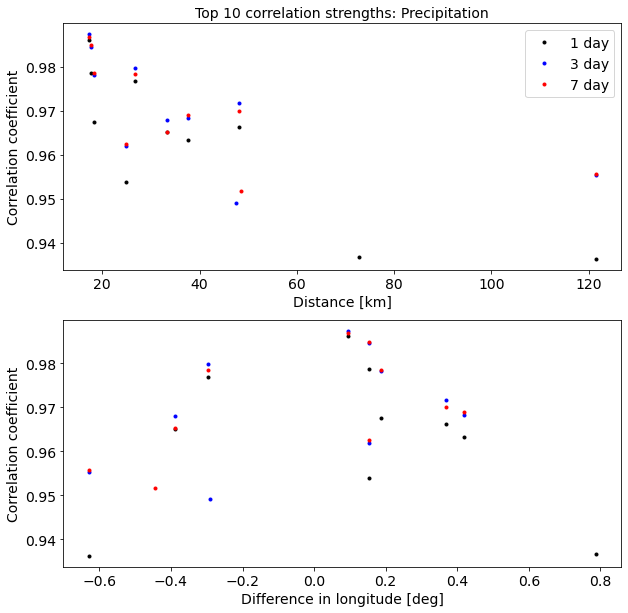

In [82]:
plt.figure(figsize=(10,10))

# Plot precipitation as a function of distance
plt.subplot(211)
plt.plot(top_p_1["distance_km"], top_p_1["p_corrcoef_1"], "k.", label="1 day")
plt.plot(top_p_3["distance_km"], top_p_3["p_corrcoef_3"], "b.", label="3 day")
plt.plot(top_p_7["distance_km"], top_p_7["p_corrcoef_7"], "r.", label="7 day")

plt.title("Top 10 correlation strengths: Precipitation", fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Correlation coefficient", fontsize=14)
plt.xlabel("Distance [km]", fontsize=14)
plt.legend(fontsize=14, bbox_to_anchor=(1,1));


# Plot precipitation as a function of difference in longitude
plt.subplot(212)
plt.plot(top_p_1["lon_diff"], top_p_1["p_corrcoef_1"], "k.", label="1 day")
plt.plot(top_p_3["lon_diff"], top_p_3["p_corrcoef_3"], "b.", label="3 day")
plt.plot(top_p_7["lon_diff"], top_p_7["p_corrcoef_7"], "r.", label="7 day")

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Correlation coefficient", fontsize=14)
plt.xlabel("Difference in longitude [deg]", fontsize=14);

### What trends do I see?
For precipitation, I see an overall decrease in correlation coefficient with distance. This might make sense because I'd imagine that weather systems which produce precipitation could be more localized than those which govern temperature, making it less likely for precipitation to show steady correlation with distance. 

An interesting data point appears at a distance of $\sim$ 120 km. Here, the difference between the 3- and 7-day coefficients and the 1-day coefficient is quite large. This may be indicative of a situation where the airport which is 120 km from the other sees the precipitation of the latter 3 to 7 days later, after the system moves between them. It is less likely that airports which are far apart would see similar precipitation within 1 day. 

However, since all of the airports are still relatively close to each other (120 km isn't an enormous distance), the magnitudes of the correlation coefficients are quite large.